In [38]:
import matplotlib.pyplot as plotter_lib

import numpy as np

import PIL as image_lib

import tensorflow as tflow

from tensorflow.keras.layers import Flatten

from keras.layers.core import Dense

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
import pathlib

In [39]:
data_directory = pathlib.Path('F:\\STFT IMAGE')
data_directory1 = pathlib.Path(data_directory)

In [40]:
img_height,img_width=150,150

batch_size=32

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 7140 files belonging to 2 classes.
Using 5712 files for training.


In [41]:
validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 7140 files belonging to 2 classes.
Using 1428 files for validation.


In [42]:
demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)

In [43]:
demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(128, activation='relu'))
demo_resnet_model.add(Dense(2, activation='sigmoid'))



In [44]:
demo_resnet_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_10 (Flatten)        (None, 2048)              0         
                                                                 
 dense_30 (Dense)            (None, 512)               1049088   
                                                                 
 dense_31 (Dense)            (None, 128)               65664     
                                                                 
 dense_32 (Dense)            (None, 2)                 258       
                                                                 
Total params: 24,702,722
Trainable params: 1,115,010
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

<Figure size 1000x1000 with 0 Axes>

In [12]:
demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10
179/179 [==============================] - 244s 1s/step - loss: 0.4701 - accuracy: 0.7978 - val_loss: 0.4112 - val_accuracy: 0.8088
Epoch 2/10
179/179 [==============================] - 247s 1s/step - loss: 0.4250 - accuracy: 0.8144 - val_loss: 0.4142 - val_accuracy: 0.8095
Epoch 3/10
179/179 [==============================] - 235s 1s/step - loss: 0.3950 - accuracy: 0.8291 - val_loss: 0.4068 - val_accuracy: 0.8277
Epoch 4/10
179/179 [==============================] - 252s 1s/step - loss: 0.3666 - accuracy: 0.8423 - val_loss: 0.3728 - val_accuracy: 0.8424
Epoch 5/10
179/179 [==============================] - 242s 1s/step - loss: 0.3436 - accuracy: 0.8529 - val_loss: 0.3852 - val_accuracy: 0.8445
Epoch 6/10
179/179 [==============================] - 242s 1s/step - loss: 0.3294 - accuracy: 0.8601 - val_loss: 0.3753 - val_accuracy: 0.8494
Epoch 7/10
179/179 [==============================] - 237s 1s/step - loss: 0.2959 - accuracy: 0.8778 - val_loss: 0.4268 - val_accuracy: 0.8200

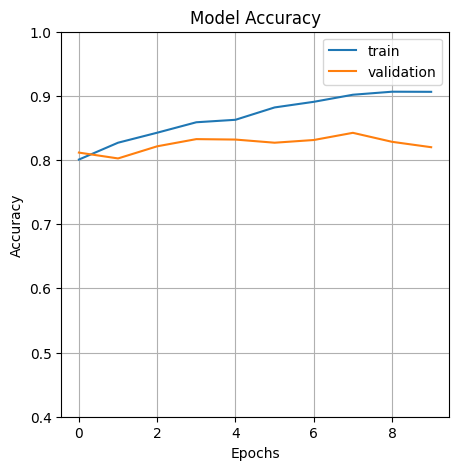

In [25]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [14]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [15]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

45/45 [==============================] - 49s 1s/step
Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1138
           1       0.21      0.23      0.22       290

    accuracy                           0.67      1428
   macro avg       0.50      0.50      0.50      1428
weighted avg       0.68      0.67      0.67      1428



### VGG-16

In [16]:
demo_vgg_16_model = Sequential()

pretrained_model_for_vgg_16_demo= tflow.keras.applications.VGG16(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_vgg_16_demo.layers:

        each_layer.trainable=False

demo_vgg_16_model.add(pretrained_model_for_demo)

In [17]:
demo_vgg_16_model.add(Flatten())

demo_vgg_16_model.add(Dense(512, activation='relu'))
demo_vgg_16_model.add(Dense(128, activation='relu'))
demo_vgg_16_model.add(Dense(2, activation='sigmoid'))

In [18]:
epochs=10

In [22]:
demo_vgg_16_model = Sequential()

pretrained_model_for_vgg_16_demo= tflow.keras.applications.VGG16(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_vgg_16_demo.layers:

        each_layer.trainable=False

demo_vgg_16_model.add(pretrained_model_for_vgg_16_demo)

In [23]:
demo_vgg_16_model.add(Flatten())

demo_vgg_16_model.add(Dense(512, activation='relu'))
demo_vgg_16_model.add(Dense(128, activation='relu'))

demo_vgg_16_model.add(Dense(2, activation='sigmoid'))

In [24]:
demo_vgg_16_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_vgg_16_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10
179/179 [==============================] - 391s 2s/step - loss: 0.4913 - accuracy: 0.8008 - val_loss: 0.4087 - val_accuracy: 0.8116
Epoch 2/10
179/179 [==============================] - 402s 2s/step - loss: 0.4173 - accuracy: 0.8270 - val_loss: 0.4373 - val_accuracy: 0.8025
Epoch 3/10
179/179 [==============================] - 573s 3s/step - loss: 0.3866 - accuracy: 0.8426 - val_loss: 0.4137 - val_accuracy: 0.8214
Epoch 4/10
179/179 [==============================] - 469s 3s/step - loss: 0.3496 - accuracy: 0.8589 - val_loss: 0.4000 - val_accuracy: 0.8326
Epoch 5/10
179/179 [==============================] - 432s 2s/step - loss: 0.3256 - accuracy: 0.8627 - val_loss: 0.3872 - val_accuracy: 0.8319
Epoch 6/10
179/179 [==============================] - 454s 3s/step - loss: 0.2971 - accuracy: 0.8820 - val_loss: 0.4557 - val_accuracy: 0.8270
Epoch 7/10
179/179 [==============================] - 436s 2s/step - loss: 0.2787 - accuracy: 0.8908 - val_loss: 0.4551 - val_accuracy: 0.8312

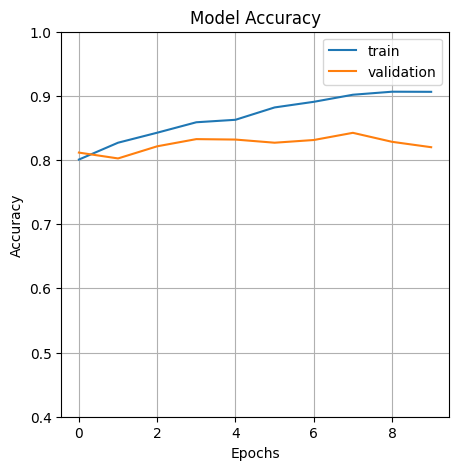

In [26]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [27]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_vgg_16_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

45/45 [==============================] - 88s 2s/step
Accuracy: 0.6491596638655462
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77      1138
           1       0.21      0.27      0.24       290

    accuracy                           0.65      1428
   macro avg       0.51      0.51      0.50      1428
weighted avg       0.68      0.65      0.66      1428



In [6]:
### VGG-19 batch size = 8


img_height,img_width=150,150

batch_size=8

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

demo_vgg_19_model = Sequential()

pretrained_model_for_vgg_19_demo= tflow.keras.applications.VGG19(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')



for each_layer in pretrained_model_for_vgg_19_demo.layers:

        each_layer.trainable=False

demo_vgg_19_model.add(pretrained_model_for_vgg_19_demo)


demo_vgg_19_model.add(Flatten())

demo_vgg_19_model.add(Dense(512, activation='relu'))
demo_vgg_19_model.add(Dense(128, activation='relu'))

demo_vgg_19_model.add(Dense(2, activation='sigmoid'))


demo_vgg_19_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_vgg_19_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Found 7140 files belonging to 2 classes.
Using 5712 files for training.
Found 7140 files belonging to 2 classes.
Using 1428 files for validation.


Epoch 1/10
714/714 [==============================] - 601s 838ms/step - loss: 0.4745 - accuracy: 0.7976 - val_loss: 0.4271 - val_accuracy: 0.8186
Epoch 2/10
714/714 [==============================] - 596s 833ms/step - loss: 0.4123 - accuracy: 0.8239 - val_loss: 0.4230 - val_accuracy: 0.8193
Epoch 3/10
714/714 [==============================] - 629s 881ms/step - loss: 0.3819 - accuracy: 0.8423 - val_loss: 0.4058 - val_accuracy: 0.8319
Epoch 4/10
714/714 [==============================] - 562s 786ms/step - loss: 0.3606 - accuracy: 0.8505 - val_loss: 0.3862 - val_accuracy: 0.8466
Epoch 5/10
714/714 [==============================] - 533s 747ms/step - loss: 0.3367 - accuracy: 0.8641 - val_loss: 0.3961 - val_accuracy: 0.8445
Epoch 6/10
714/714 [==============================] - 531s 744ms/step - loss: 0.3191 - accuracy: 0.8720 - val_loss: 0.4206 - val_accuracy: 0.8487
Epoch 7/10
714/714 [==============================] - 526s 737ms/step - loss: 0.2952 - accuracy: 0.8773 - val_loss: 0.4384 -

<Figure size 1000x1000 with 0 Axes>

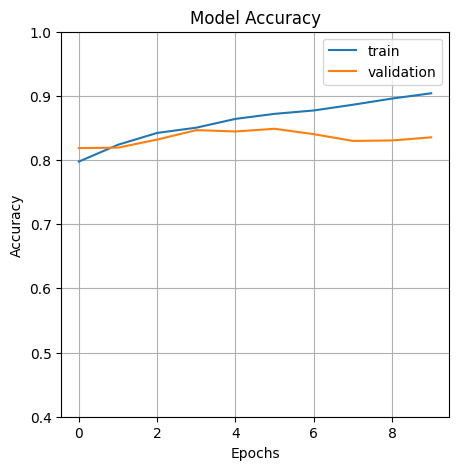

In [7]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [8]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [9]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_vgg_19_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

179/179 [==============================] - 118s 654ms/step
Accuracy: 0.6813725490196079
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1138
           1       0.18      0.17      0.17       290

    accuracy                           0.68      1428
   macro avg       0.49      0.49      0.49      1428
weighted avg       0.67      0.68      0.67      1428



In [10]:
### VGG-19 batch size = 16


img_height,img_width=150,150

batch_size=16

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

demo_vgg_19_model = Sequential()

pretrained_model_for_vgg_19_demo= tflow.keras.applications.VGG19(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')



for each_layer in pretrained_model_for_vgg_19_demo.layers:

        each_layer.trainable=False

demo_vgg_19_model.add(pretrained_model_for_vgg_19_demo)


demo_vgg_19_model.add(Flatten())

demo_vgg_19_model.add(Dense(512, activation='relu'))
demo_vgg_19_model.add(Dense(128, activation='relu'))

demo_vgg_19_model.add(Dense(2, activation='sigmoid'))


demo_vgg_19_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_vgg_19_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Found 7140 files belonging to 2 classes.
Using 5712 files for training.
Found 7140 files belonging to 2 classes.
Using 1428 files for validation.


Epoch 1/10
357/357 [==============================] - 585s 2s/step - loss: 0.4725 - accuracy: 0.8044 - val_loss: 0.4669 - val_accuracy: 0.7822
Epoch 2/10
357/357 [==============================] - 644s 2s/step - loss: 0.4108 - accuracy: 0.8220 - val_loss: 0.3990 - val_accuracy: 0.8270
Epoch 3/10
357/357 [==============================] - 534s 1s/step - loss: 0.3832 - accuracy: 0.8372 - val_loss: 0.4044 - val_accuracy: 0.8361
Epoch 4/10
357/357 [==============================] - 522s 1s/step - loss: 0.3556 - accuracy: 0.8514 - val_loss: 0.4176 - val_accuracy: 0.8235
Epoch 5/10
357/357 [==============================] - 617s 2s/step - loss: 0.3343 - accuracy: 0.8629 - val_loss: 0.4071 - val_accuracy: 0.8284
Epoch 6/10
357/357 [==============================] - 655s 2s/step - loss: 0.3105 - accuracy: 0.8713 - val_loss: 0.3881 - val_accuracy: 0.8333
Epoch 7/10
357/357 [==============================] - 625s 2s/step - loss: 0.2944 - accuracy: 0.8790 - val_loss: 0.4016 - val_accuracy: 0.8501

<Figure size 1000x1000 with 0 Axes>

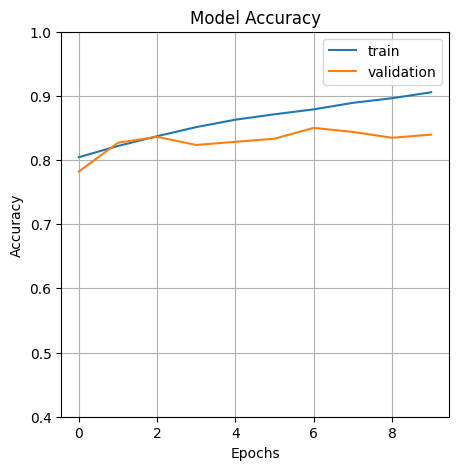

In [11]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [12]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [13]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_vgg_19_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

90/90 [==============================] - 101s 1s/step
Accuracy: 0.7289915966386554
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84      1138
           1       0.19      0.10      0.13       290

    accuracy                           0.73      1428
   macro avg       0.49      0.50      0.49      1428
weighted avg       0.67      0.73      0.70      1428



In [14]:
### VGG-19 batch size = 32


img_height,img_width=150,150

batch_size=32

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

demo_vgg_19_model = Sequential()

pretrained_model_for_vgg_19_demo= tflow.keras.applications.VGG19(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')



for each_layer in pretrained_model_for_vgg_19_demo.layers:

        each_layer.trainable=False

demo_vgg_19_model.add(pretrained_model_for_vgg_19_demo)


demo_vgg_19_model.add(Flatten())

demo_vgg_19_model.add(Dense(512, activation='relu'))
demo_vgg_19_model.add(Dense(128, activation='relu'))

demo_vgg_19_model.add(Dense(2, activation='sigmoid'))


demo_vgg_19_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_vgg_19_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Found 7140 files belonging to 2 classes.
Using 5712 files for training.
Found 7140 files belonging to 2 classes.
Using 1428 files for validation.


Epoch 1/10
179/179 [==============================] - 498s 3s/step - loss: 0.4720 - accuracy: 0.8004 - val_loss: 0.4220 - val_accuracy: 0.7962
Epoch 2/10
179/179 [==============================] - 496s 3s/step - loss: 0.4136 - accuracy: 0.8186 - val_loss: 0.4048 - val_accuracy: 0.8214
Epoch 3/10
179/179 [==============================] - 498s 3s/step - loss: 0.3835 - accuracy: 0.8416 - val_loss: 0.3871 - val_accuracy: 0.8368
Epoch 4/10
179/179 [==============================] - 499s 3s/step - loss: 0.3548 - accuracy: 0.8531 - val_loss: 0.4174 - val_accuracy: 0.8347
Epoch 5/10
179/179 [==============================] - 496s 3s/step - loss: 0.3352 - accuracy: 0.8584 - val_loss: 0.4043 - val_accuracy: 0.8431
Epoch 6/10
179/179 [==============================] - 499s 3s/step - loss: 0.3066 - accuracy: 0.8731 - val_loss: 0.4000 - val_accuracy: 0.8487
Epoch 7/10
179/179 [==============================] - 497s 3s/step - loss: 0.2820 - accuracy: 0.8848 - val_loss: 0.4184 - val_accuracy: 0.8431

<Figure size 1000x1000 with 0 Axes>

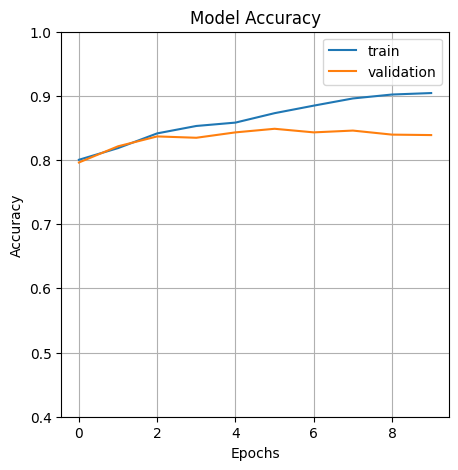

In [15]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [16]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [17]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_vgg_19_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

45/45 [==============================] - 99s 2s/step
Accuracy: 0.6834733893557423
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1138
           1       0.21      0.21      0.21       290

    accuracy                           0.68      1428
   macro avg       0.51      0.51      0.51      1428
weighted avg       0.68      0.68      0.68      1428



In [18]:
### VGG-19 batch size = 64


img_height,img_width=150,150

batch_size=64

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

demo_vgg_19_model = Sequential()

pretrained_model_for_vgg_19_demo= tflow.keras.applications.VGG19(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')



for each_layer in pretrained_model_for_vgg_19_demo.layers:

        each_layer.trainable=False

demo_vgg_19_model.add(pretrained_model_for_vgg_19_demo)


demo_vgg_19_model.add(Flatten())

demo_vgg_19_model.add(Dense(512, activation='relu'))
demo_vgg_19_model.add(Dense(128, activation='relu'))

demo_vgg_19_model.add(Dense(2, activation='sigmoid'))


demo_vgg_19_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_vgg_19_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Found 7140 files belonging to 2 classes.
Using 5712 files for training.
Found 7140 files belonging to 2 classes.
Using 1428 files for validation.


Epoch 1/10
90/90 [==============================] - 501s 6s/step - loss: 0.5043 - accuracy: 0.7953 - val_loss: 0.4145 - val_accuracy: 0.8116
Epoch 2/10
90/90 [==============================] - 499s 6s/step - loss: 0.4097 - accuracy: 0.8274 - val_loss: 0.4133 - val_accuracy: 0.8151
Epoch 3/10
90/90 [==============================] - 498s 6s/step - loss: 0.3732 - accuracy: 0.8417 - val_loss: 0.4122 - val_accuracy: 0.8193
Epoch 4/10
90/90 [==============================] - 500s 6s/step - loss: 0.3381 - accuracy: 0.8620 - val_loss: 0.4200 - val_accuracy: 0.8256
Epoch 5/10
90/90 [==============================] - 504s 6s/step - loss: 0.3262 - accuracy: 0.8648 - val_loss: 0.4128 - val_accuracy: 0.8165
Epoch 6/10
90/90 [==============================] - 503s 6s/step - loss: 0.3002 - accuracy: 0.8810 - val_loss: 0.4070 - val_accuracy: 0.8249
Epoch 7/10
90/90 [==============================] - 500s 6s/step - loss: 0.2804 - accuracy: 0.8892 - val_loss: 0.4039 - val_accuracy: 0.8494
Epoch 8/10
90

<Figure size 1000x1000 with 0 Axes>

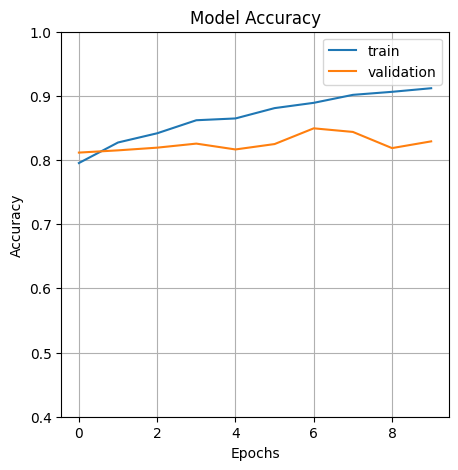

In [19]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [20]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [21]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_vgg_19_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

23/23 [==============================] - 100s 4s/step
Accuracy: 0.6876750700280112
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1138
           1       0.18      0.15      0.16       290

    accuracy                           0.69      1428
   macro avg       0.48      0.49      0.48      1428
weighted avg       0.67      0.69      0.68      1428



In [22]:
#### Resnet 101 batch size =32



img_height,img_width=150,150

batch_size=32

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)


demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet101(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)


demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(128, activation='relu'))
demo_resnet_model.add(Dense(2, activation='sigmoid'))

import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10


demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Found 7140 files belonging to 2 classes.
Using 5712 files for training.
Found 7140 files belonging to 2 classes.
Using 1428 files for validation.


Epoch 1/10
179/179 [==============================] - 463s 3s/step - loss: 0.4574 - accuracy: 0.8016 - val_loss: 0.4047 - val_accuracy: 0.8256
Epoch 2/10
179/179 [==============================] - 468s 3s/step - loss: 0.4145 - accuracy: 0.8195 - val_loss: 0.4043 - val_accuracy: 0.8256
Epoch 3/10
179/179 [==============================] - 423s 2s/step - loss: 0.3964 - accuracy: 0.8326 - val_loss: 0.3733 - val_accuracy: 0.8340
Epoch 4/10
179/179 [==============================] - 410s 2s/step - loss: 0.3745 - accuracy: 0.8430 - val_loss: 0.4123 - val_accuracy: 0.8284
Epoch 5/10
179/179 [==============================] - 420s 2s/step - loss: 0.3562 - accuracy: 0.8545 - val_loss: 0.3783 - val_accuracy: 0.8347
Epoch 6/10
179/179 [==============================] - 450s 3s/step - loss: 0.3372 - accuracy: 0.8584 - val_loss: 0.3617 - val_accuracy: 0.8424
Epoch 7/10
179/179 [==============================] - 401s 2s/step - loss: 0.3190 - accuracy: 0.8655 - val_loss: 0.3764 - val_accuracy: 0.8452

<Figure size 1000x1000 with 0 Axes>

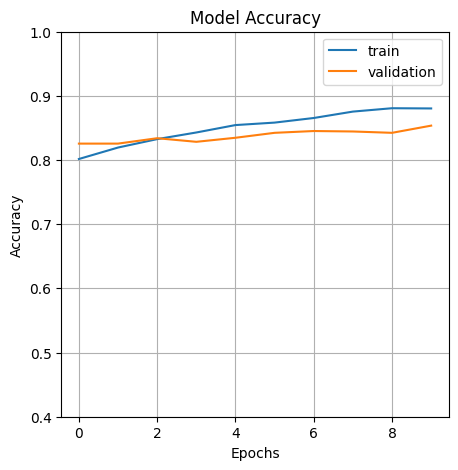

In [23]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [24]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [25]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

45/45 [==============================] - 79s 2s/step
Accuracy: 0.6981792717086834
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1138
           1       0.21      0.17      0.19       290

    accuracy                           0.70      1428
   macro avg       0.50      0.50      0.50      1428
weighted avg       0.68      0.70      0.69      1428



In [26]:
#### Resnet 101 batch size =8



img_height,img_width=150,150

batch_size=8

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)


demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet101(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)


demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(128, activation='relu'))
demo_resnet_model.add(Dense(2, activation='sigmoid'))

import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10


demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Found 7140 files belonging to 2 classes.
Using 5712 files for training.
Found 7140 files belonging to 2 classes.
Using 1428 files for validation.


Epoch 1/10
714/714 [==============================] - 454s 625ms/step - loss: 0.4627 - accuracy: 0.7983 - val_loss: 0.4533 - val_accuracy: 0.8130
Epoch 2/10
714/714 [==============================] - 442s 619ms/step - loss: 0.4170 - accuracy: 0.8183 - val_loss: 0.3999 - val_accuracy: 0.8368
Epoch 3/10
714/714 [==============================] - 442s 620ms/step - loss: 0.3887 - accuracy: 0.8379 - val_loss: 0.3820 - val_accuracy: 0.8298
Epoch 4/10
714/714 [==============================] - 442s 619ms/step - loss: 0.3689 - accuracy: 0.8451 - val_loss: 0.3744 - val_accuracy: 0.8361
Epoch 5/10
714/714 [==============================] - 444s 622ms/step - loss: 0.3515 - accuracy: 0.8550 - val_loss: 0.3773 - val_accuracy: 0.8347
Epoch 6/10
714/714 [==============================] - 444s 622ms/step - loss: 0.3289 - accuracy: 0.8627 - val_loss: 0.3662 - val_accuracy: 0.8480
Epoch 7/10
714/714 [==============================] - 445s 623ms/step - loss: 0.3154 - accuracy: 0.8669 - val_loss: 0.3653 -

<Figure size 1000x1000 with 0 Axes>

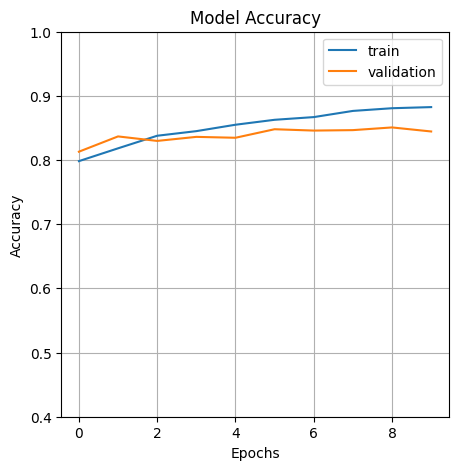

In [27]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [28]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [29]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

179/179 [==============================] - 94s 507ms/step
Accuracy: 0.7226890756302521
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      1138
           1       0.22      0.15      0.18       290

    accuracy                           0.72      1428
   macro avg       0.51      0.51      0.51      1428
weighted avg       0.68      0.72      0.70      1428



In [30]:
#### Resnet 101 batch size =16



img_height,img_width=150,150

batch_size=16

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)


demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet101(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)


demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(128, activation='relu'))
demo_resnet_model.add(Dense(2, activation='sigmoid'))

import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10


demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Found 7140 files belonging to 2 classes.
Using 5712 files for training.
Found 7140 files belonging to 2 classes.
Using 1428 files for validation.


Epoch 1/10
357/357 [==============================] - 431s 1s/step - loss: 0.4596 - accuracy: 0.7962 - val_loss: 0.4363 - val_accuracy: 0.8207
Epoch 2/10
357/357 [==============================] - 446s 1s/step - loss: 0.4087 - accuracy: 0.8223 - val_loss: 0.4076 - val_accuracy: 0.8249
Epoch 3/10
357/357 [==============================] - 486s 1s/step - loss: 0.3902 - accuracy: 0.8363 - val_loss: 0.4124 - val_accuracy: 0.8438
Epoch 4/10
357/357 [==============================] - 436s 1s/step - loss: 0.3572 - accuracy: 0.8535 - val_loss: 0.4080 - val_accuracy: 0.8249
Epoch 5/10
357/357 [==============================] - 454s 1s/step - loss: 0.3457 - accuracy: 0.8559 - val_loss: 0.3762 - val_accuracy: 0.8417
Epoch 6/10
357/357 [==============================] - 425s 1s/step - loss: 0.3281 - accuracy: 0.8638 - val_loss: 0.3789 - val_accuracy: 0.8445
Epoch 7/10
357/357 [==============================] - 419s 1s/step - loss: 0.3090 - accuracy: 0.8699 - val_loss: 0.3868 - val_accuracy: 0.8424

<Figure size 1000x1000 with 0 Axes>

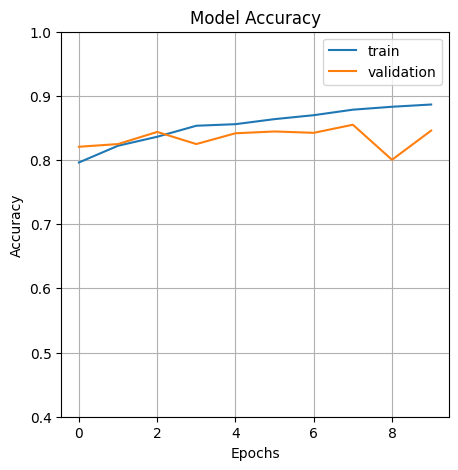

In [31]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [32]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [33]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

90/90 [==============================] - 85s 912ms/step
Accuracy: 0.7086834733893558
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1138
           1       0.24      0.20      0.22       290

    accuracy                           0.71      1428
   macro avg       0.52      0.52      0.52      1428
weighted avg       0.69      0.71      0.70      1428



In [34]:
#### Resnet 101 batch size =64



img_height,img_width=150,150

batch_size=64

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)


demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet101(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)


demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(128, activation='relu'))
demo_resnet_model.add(Dense(2, activation='sigmoid'))

import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10


demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Found 7140 files belonging to 2 classes.
Using 5712 files for training.
Found 7140 files belonging to 2 classes.
Using 1428 files for validation.


Epoch 1/10
90/90 [==============================] - 439s 5s/step - loss: 0.4673 - accuracy: 0.7973 - val_loss: 0.4115 - val_accuracy: 0.8123
Epoch 2/10
90/90 [==============================] - 413s 5s/step - loss: 0.4161 - accuracy: 0.8206 - val_loss: 0.3963 - val_accuracy: 0.8242
Epoch 3/10
90/90 [==============================] - 413s 5s/step - loss: 0.3909 - accuracy: 0.8335 - val_loss: 0.3836 - val_accuracy: 0.8382
Epoch 4/10
90/90 [==============================] - 415s 5s/step - loss: 0.3587 - accuracy: 0.8480 - val_loss: 0.3855 - val_accuracy: 0.8382
Epoch 5/10
90/90 [==============================] - 415s 5s/step - loss: 0.3570 - accuracy: 0.8480 - val_loss: 0.3609 - val_accuracy: 0.8466
Epoch 6/10
90/90 [==============================] - 430s 5s/step - loss: 0.3304 - accuracy: 0.8615 - val_loss: 0.3770 - val_accuracy: 0.8368
Epoch 7/10
90/90 [==============================] - 458s 5s/step - loss: 0.3076 - accuracy: 0.8727 - val_loss: 0.3935 - val_accuracy: 0.8410
Epoch 8/10
90

<Figure size 1000x1000 with 0 Axes>

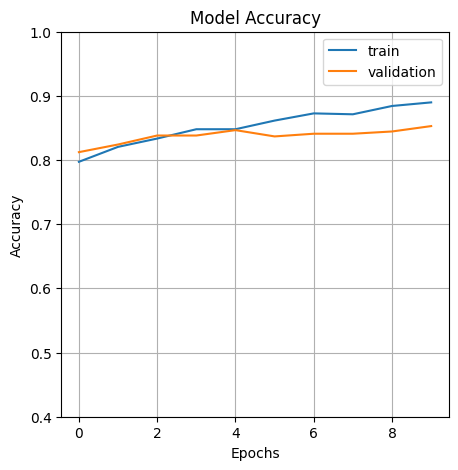

In [35]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [36]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [37]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

23/23 [==============================] - 79s 3s/step
Accuracy: 0.7016806722689075
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      1138
           1       0.16      0.11      0.13       290

    accuracy                           0.70      1428
   macro avg       0.47      0.48      0.48      1428
weighted avg       0.66      0.70      0.68      1428



In [45]:

#### Resnet 50 batch size =8



img_height,img_width=150,150

batch_size=8

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)


demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)


demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(128, activation='relu'))
demo_resnet_model.add(Dense(2, activation='sigmoid'))

import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10


demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)


Found 7140 files belonging to 2 classes.
Using 5712 files for training.
Found 7140 files belonging to 2 classes.
Using 1428 files for validation.


Epoch 1/10
714/714 [==============================] - 358s 483ms/step - loss: 0.4660 - accuracy: 0.8004 - val_loss: 0.4577 - val_accuracy: 0.8130
Epoch 2/10
714/714 [==============================] - 293s 410ms/step - loss: 0.4223 - accuracy: 0.8150 - val_loss: 0.3970 - val_accuracy: 0.8319
Epoch 3/10
714/714 [==============================] - 293s 410ms/step - loss: 0.3966 - accuracy: 0.8283 - val_loss: 0.3917 - val_accuracy: 0.8298
Epoch 4/10
714/714 [==============================] - 291s 407ms/step - loss: 0.3726 - accuracy: 0.8384 - val_loss: 0.3997 - val_accuracy: 0.8347
Epoch 5/10
714/714 [==============================] - 315s 442ms/step - loss: 0.3506 - accuracy: 0.8529 - val_loss: 0.3962 - val_accuracy: 0.8298
Epoch 6/10
714/714 [==============================] - 347s 487ms/step - loss: 0.3251 - accuracy: 0.8601 - val_loss: 0.4025 - val_accuracy: 0.8389
Epoch 7/10
714/714 [==============================] - 317s 444ms/step - loss: 0.3030 - accuracy: 0.8708 - val_loss: 0.4114 -

<Figure size 1000x1000 with 0 Axes>

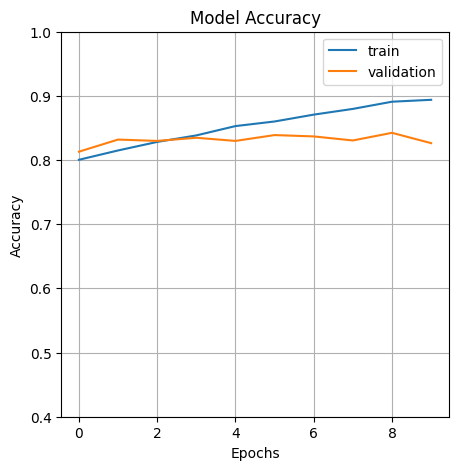

In [46]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [47]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [48]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

179/179 [==============================] - 58s 314ms/step
Accuracy: 0.6498599439775911
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      1138
           1       0.17      0.19      0.18       290

    accuracy                           0.65      1428
   macro avg       0.48      0.48      0.48      1428
weighted avg       0.66      0.65      0.66      1428



In [49]:

#### Resnet 50 batch size =16



img_height,img_width=150,150

batch_size=16

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)


demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)


demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(128, activation='relu'))
demo_resnet_model.add(Dense(2, activation='sigmoid'))

import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10


demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)


Found 7140 files belonging to 2 classes.
Using 5712 files for training.
Found 7140 files belonging to 2 classes.
Using 1428 files for validation.


Epoch 1/10
357/357 [==============================] - 272s 743ms/step - loss: 0.4568 - accuracy: 0.7992 - val_loss: 0.4415 - val_accuracy: 0.8144
Epoch 2/10
357/357 [==============================] - 262s 733ms/step - loss: 0.4092 - accuracy: 0.8241 - val_loss: 0.4505 - val_accuracy: 0.7885
Epoch 3/10
357/357 [==============================] - 263s 737ms/step - loss: 0.3886 - accuracy: 0.8367 - val_loss: 0.3930 - val_accuracy: 0.8368
Epoch 4/10
357/357 [==============================] - 263s 736ms/step - loss: 0.3628 - accuracy: 0.8536 - val_loss: 0.4593 - val_accuracy: 0.7815
Epoch 5/10
357/357 [==============================] - 263s 736ms/step - loss: 0.3432 - accuracy: 0.8540 - val_loss: 0.3917 - val_accuracy: 0.8438
Epoch 6/10
357/357 [==============================] - 265s 742ms/step - loss: 0.3220 - accuracy: 0.8626 - val_loss: 0.3840 - val_accuracy: 0.8424
Epoch 7/10
357/357 [==============================] - 264s 740ms/step - loss: 0.3041 - accuracy: 0.8682 - val_loss: 0.4104 -

<Figure size 1000x1000 with 0 Axes>

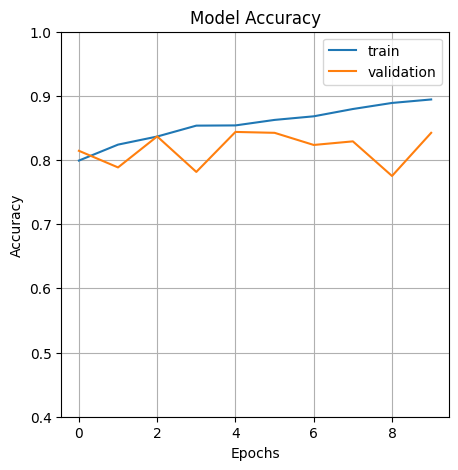

In [50]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [51]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [52]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

90/90 [==============================] - 53s 580ms/step
Accuracy: 0.7233893557422969
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      1138
           1       0.23      0.16      0.19       290

    accuracy                           0.72      1428
   macro avg       0.52      0.51      0.51      1428
weighted avg       0.69      0.72      0.70      1428



In [53]:

#### Resnet 50 batch size =64



img_height,img_width=150,150

batch_size=64

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)


demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)


demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(128, activation='relu'))
demo_resnet_model.add(Dense(2, activation='sigmoid'))

import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10


demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)


Found 7140 files belonging to 2 classes.
Using 5712 files for training.
Found 7140 files belonging to 2 classes.
Using 1428 files for validation.


Epoch 1/10
90/90 [==============================] - 267s 3s/step - loss: 0.4743 - accuracy: 0.7967 - val_loss: 0.4109 - val_accuracy: 0.8151
Epoch 2/10
90/90 [==============================] - 262s 3s/step - loss: 0.4154 - accuracy: 0.8214 - val_loss: 0.4048 - val_accuracy: 0.8179
Epoch 3/10
90/90 [==============================] - 261s 3s/step - loss: 0.3942 - accuracy: 0.8283 - val_loss: 0.3835 - val_accuracy: 0.8396
Epoch 4/10
90/90 [==============================] - 262s 3s/step - loss: 0.3617 - accuracy: 0.8470 - val_loss: 0.3960 - val_accuracy: 0.8361
Epoch 5/10
90/90 [==============================] - 261s 3s/step - loss: 0.3494 - accuracy: 0.8494 - val_loss: 0.3667 - val_accuracy: 0.8529
Epoch 6/10
90/90 [==============================] - 271s 3s/step - loss: 0.3276 - accuracy: 0.8622 - val_loss: 0.3661 - val_accuracy: 0.8501
Epoch 7/10
90/90 [==============================] - 279s 3s/step - loss: 0.3050 - accuracy: 0.8711 - val_loss: 0.3772 - val_accuracy: 0.8424
Epoch 8/10
90

<Figure size 1000x1000 with 0 Axes>

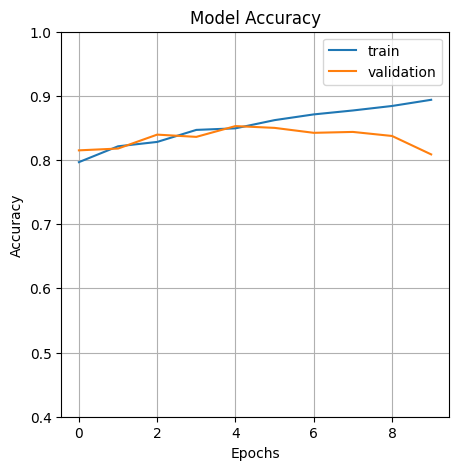

In [54]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [55]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [56]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

23/23 [==============================] - 54s 2s/step
Accuracy: 0.6295518207282913
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76      1138
           1       0.15      0.18      0.16       290

    accuracy                           0.63      1428
   macro avg       0.46      0.46      0.46      1428
weighted avg       0.65      0.63      0.64      1428



In [57]:

#### vgg16 batch size =8



img_height,img_width=150,150

batch_size=8

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)


demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.VGG16(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)


demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(128, activation='relu'))
demo_resnet_model.add(Dense(2, activation='sigmoid'))

import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10


demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)


Found 7140 files belonging to 2 classes.
Using 5712 files for training.
Found 7140 files belonging to 2 classes.
Using 1428 files for validation.


Epoch 1/10
714/714 [==============================] - 563s 786ms/step - loss: 0.4748 - accuracy: 0.7997 - val_loss: 0.4516 - val_accuracy: 0.7990
Epoch 2/10
714/714 [==============================] - 556s 778ms/step - loss: 0.4231 - accuracy: 0.8192 - val_loss: 0.4020 - val_accuracy: 0.8249
Epoch 3/10
714/714 [==============================] - 552s 774ms/step - loss: 0.3919 - accuracy: 0.8353 - val_loss: 0.3931 - val_accuracy: 0.8291
Epoch 4/10
714/714 [==============================] - 549s 770ms/step - loss: 0.3664 - accuracy: 0.8454 - val_loss: 0.4120 - val_accuracy: 0.8242
Epoch 5/10
714/714 [==============================] - 549s 769ms/step - loss: 0.3410 - accuracy: 0.8552 - val_loss: 0.4112 - val_accuracy: 0.8270
Epoch 6/10
714/714 [==============================] - 548s 767ms/step - loss: 0.3184 - accuracy: 0.8715 - val_loss: 0.4585 - val_accuracy: 0.8305
Epoch 7/10
714/714 [==============================] - 551s 772ms/step - loss: 0.2953 - accuracy: 0.8811 - val_loss: 0.5382 -

<Figure size 1000x1000 with 0 Axes>

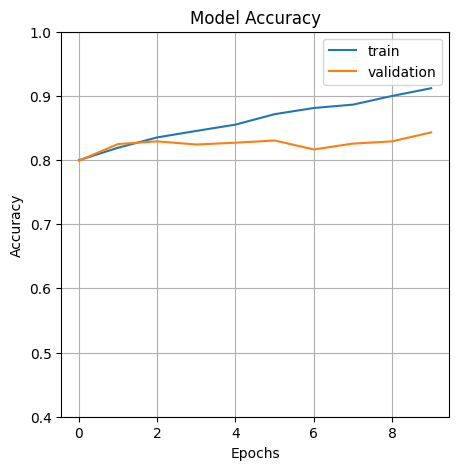

In [58]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [59]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [60]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

179/179 [==============================] - 109s 607ms/step
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1138
           1       0.20      0.13      0.16       290

    accuracy                           0.71      1428
   macro avg       0.50      0.50      0.49      1428
weighted avg       0.67      0.71      0.69      1428



In [61]:

#### vgg16 batch size =16



img_height,img_width=150,150

batch_size=16

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)


demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.VGG16(include_top=False,

                   input_shape=(150,150,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)


demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(128, activation='relu'))
demo_resnet_model.add(Dense(2, activation='sigmoid'))

import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10


demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)


Found 7140 files belonging to 2 classes.
Using 5712 files for training.
Found 7140 files belonging to 2 classes.
Using 1428 files for validation.


Epoch 1/10
357/357 [==============================] - 567s 2s/step - loss: 0.4790 - accuracy: 0.7948 - val_loss: 0.4474 - val_accuracy: 0.8018
Epoch 2/10
357/357 [==============================] - 566s 2s/step - loss: 0.4095 - accuracy: 0.8234 - val_loss: 0.3837 - val_accuracy: 0.8305
Epoch 3/10
357/357 [==============================] - 566s 2s/step - loss: 0.3799 - accuracy: 0.8389 - val_loss: 0.3952 - val_accuracy: 0.8333
Epoch 4/10
357/357 [==============================] - 581s 2s/step - loss: 0.3561 - accuracy: 0.8512 - val_loss: 0.3747 - val_accuracy: 0.8368
Epoch 5/10
357/357 [==============================] - 578s 2s/step - loss: 0.3314 - accuracy: 0.8657 - val_loss: 0.4047 - val_accuracy: 0.8340
Epoch 6/10
357/357 [==============================] - 617s 2s/step - loss: 0.3102 - accuracy: 0.8717 - val_loss: 0.4081 - val_accuracy: 0.8361
Epoch 7/10
357/357 [==============================] - 632s 2s/step - loss: 0.2848 - accuracy: 0.8839 - val_loss: 0.4838 - val_accuracy: 0.8158

<Figure size 1000x1000 with 0 Axes>

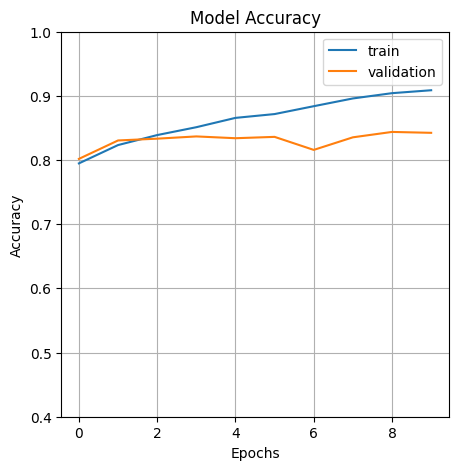

In [62]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [63]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [64]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

90/90 [==============================] - 94s 1s/step
Accuracy: 0.7584033613445378
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      1138
           1       0.24      0.09      0.13       290

    accuracy                           0.76      1428
   macro avg       0.52      0.51      0.50      1428
weighted avg       0.69      0.76      0.71      1428

